In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# FILTRACIONES

Carga del dataset de filtraciones.

In [2]:
df = pd.read_excel('Filtraciones E08.xlsx')
df.tail()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
20026,18/06/2020 07:00:00,E008ZUAFC001,NaN,cm,17.51,l/min,N,NC,NaN
20027,18/06/2020 07:00:00,E008ZUAFC005,NaN,cm,259.04,l/min,N,NC,NaN
20028,18/06/2020 07:00:00,E008ZUAFC004,NaN,cm,83.35,l/min,N,NC,NaN
20029,18/06/2020 07:00:00,E008ZUAFC003,NaN,cm,31.28,l/min,N,NC,NaN
20030,18/06/2020 07:00:00,E008ZUAFC002,NaN,cm,13.76,l/min,N,NC,NaN


In [3]:
df.shape

(20031, 9)

Eliminación de las columnas irrelevantes.

In [4]:
del df["Lectura"]
del df["Unidades de Lectura"]
del df["Unidades de Medida"]
del df["Flag"]
del df["Flag Manipulación"]
del df["Observaciones"]

In [5]:
df.head()

,Fecha,Sensor,Medida
0,02/10/2009 00:00:00,E008ZUAFC001,10.53
1,02/10/2009 00:00:00,E008ZUAFC005,78.79
2,02/10/2009 00:00:00,E008ZUAFC004,NaN
3,02/10/2009 00:00:00,E008ZUAFC003,36.08
4,02/10/2009 00:00:00,E008ZUAFC002,11.52


Conversión de las fechas a formato datetime.

In [6]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format ='%d/%m/%Y %H:%M:%S')

Comprobación del número de aforadores.

In [7]:
df["Sensor"].unique()

array(['E008ZUAFC001', 'E008ZUAFC005', 'E008ZUAFC004', 'E008ZUAFC003',
       'E008ZUAFC002', 'E008UMAFC006', 'E008UMAFC007'], dtype=object)

Comprobación del número de NaN.

In [8]:
for i in df["Sensor"].unique():
    print(df[df["Sensor"]==i].isnull().sum())
    print("**************")

Fecha       0
Sensor      0
Medida    109
dtype: int64
**************
Fecha       0
Sensor      0
Medida    252
dtype: int64
**************
Fecha       0
Sensor      0
Medida    274
dtype: int64
**************
Fecha       0
Sensor      0
Medida    107
dtype: int64
**************
Fecha       0
Sensor      0
Medida    109
dtype: int64
**************
Fecha     0
Sensor    0
Medida    0
dtype: int64
**************
Fecha     0
Sensor    0
Medida    0
dtype: int64
**************


Selección de los valores de fecha y medida de cada aforador.

In [9]:
df[df["Sensor"]=="E008ZUAFC001"][["Fecha","Medida"]]

,Fecha,Medida
0,2009-10-02 00:00:00,10.53
5,2009-10-03 00:00:00,10.53
10,2009-10-04 00:00:00,10.53
15,2009-10-05 00:00:00,10.53
20,2009-10-06 00:00:00,10.53
...,...,...
20006,2020-06-14 07:00:00,17.51
20011,2020-06-15 07:00:00,17.51
20016,2020-06-16 07:00:00,17.51
20021,2020-06-17 07:00:00,17.51


Combinación de los valores de todos los aforadores en un nuevo dataframe.

In [10]:
filt = df.Fecha
for i in df["Sensor"].unique():
    filt=pd.merge(filt, df[df["Sensor"]==i][["Fecha","Medida"]], on="Fecha", how="outer" )

In [12]:
filt.tail(10)

,Fecha,Medida_x,Medida_y,Medida_x,Medida_y,Medida_x,Medida_y,Medida
20021,2020-06-17 07:00:00,17.51,260.35,81.70,31.46,13.76,NaN,NaN
20022,2020-06-17 07:00:00,17.51,260.35,81.70,31.46,13.76,NaN,NaN
20023,2020-06-17 07:00:00,17.51,260.35,81.70,31.46,13.76,NaN,NaN
20024,2020-06-17 07:00:00,17.51,260.35,81.70,31.46,13.76,NaN,NaN
20025,2020-06-17 07:00:00,17.51,260.35,81.70,31.46,13.76,NaN,NaN
20026,2020-06-18 07:00:00,17.51,259.04,83.35,31.28,13.76,NaN,NaN
20027,2020-06-18 07:00:00,17.51,259.04,83.35,31.28,13.76,NaN,NaN
20028,2020-06-18 07:00:00,17.51,259.04,83.35,31.28,13.76,NaN,NaN
20029,2020-06-18 07:00:00,17.51,259.04,83.35,31.28,13.76,NaN,NaN
20030,2020-06-18 07:00:00,17.51,259.04,83.35,31.28,13.76,NaN,NaN


Modificación del nombre de los aforadores para que coincida con el del informe.

In [13]:
filt.columns=["Fecha","AF-01","AF-05","AF-04","AF-03","AF-02","s6","s7"]
filt.head()

,Fecha,AF-01,AF-05,AF-04,AF-03,AF-02,s6,s7
0,2009-10-02,10.53,78.79,NaN,36.08,11.52,NaN,NaN
1,2009-10-02,10.53,78.79,NaN,36.08,11.52,NaN,NaN
2,2009-10-02,10.53,78.79,NaN,36.08,11.52,NaN,NaN
3,2009-10-02,10.53,78.79,NaN,36.08,11.52,NaN,NaN
4,2009-10-02,10.53,78.79,NaN,36.08,11.52,NaN,NaN


In [14]:
filt.isnull().sum()

Fecha        0
AF-01      998
AF-05     4100
AF-04     1858
AF-03     1003
AF-02      995
s6       19579
s7       19742
dtype: int64

Eliminación de los valores de los aforadores 6 y 7 (fueron instalados con posterioridad y presentan un alto porcentaje de NaN).

In [15]:
del filt["s7"]
del filt["s6"]

In [16]:
filt.shape

(20031, 6)

Convergencia de las fechas duplicadas mediante una media.

In [17]:
filt = filt.resample('d', on='Fecha').mean().dropna(how='all')
filt

,AF-01,AF-05,AF-04,AF-03,AF-02
Fecha,,,,,
2009-10-02,10.53,78.79,NaN,36.08,11.52
2009-10-03,10.53,78.79,NaN,36.08,11.52
2009-10-04,10.53,78.79,NaN,37.09,11.52
2009-10-05,10.53,77.20,NaN,37.09,11.52
2009-10-06,10.53,77.20,NaN,37.09,11.52
...,...,...,...,...,...
2020-06-14,17.51,258.39,86.36,31.65,13.65
2020-06-15,17.51,256.43,82.03,31.46,13.65
2020-06-16,17.51,256.43,81.38,31.46,13.65


In [18]:
filt.isnull().sum()

AF-01      3
AF-05    735
AF-04    183
AF-03      5
AF-02      3
dtype: int64

Creación de gráficos.

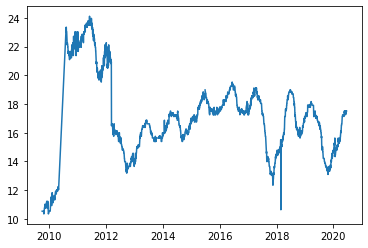

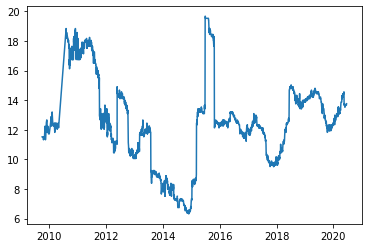

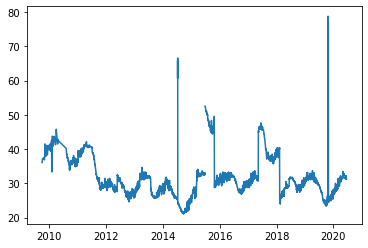

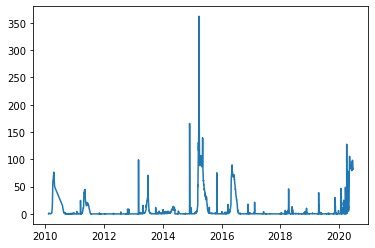

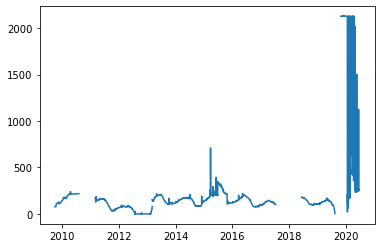

In [19]:
for i in ["AF-01","AF-02","AF-03","AF-04","AF-05"]:
    plt.subplots()
    plt.plot(filt[i])

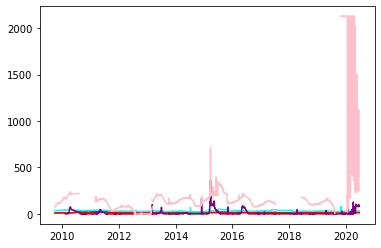

In [20]:
plt.plot(filt["AF-01"], color="green")
plt.plot(filt["AF-02"], color="red")
plt.plot(filt["AF-03"], color="cyan")
plt.plot(filt["AF-04"], color="purple")
plt.plot(filt["AF-05"], color="pink")

Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [21]:
filt['Fecha'] = filt.index
filt.reset_index(drop=True, inplace=True)
filt

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha
0,10.53,78.79,NaN,36.08,11.52,2009-10-02
1,10.53,78.79,NaN,36.08,11.52,2009-10-03
2,10.53,78.79,NaN,37.09,11.52,2009-10-04
3,10.53,77.20,NaN,37.09,11.52,2009-10-05
4,10.53,77.20,NaN,37.09,11.52,2009-10-06
...,...,...,...,...,...,...
3797,17.51,258.39,86.36,31.65,13.65,2020-06-14
3798,17.51,256.43,82.03,31.46,13.65,2020-06-15
3799,17.51,256.43,81.38,31.46,13.65,2020-06-16
3800,17.51,260.35,81.70,31.46,13.76,2020-06-17


# VARIABLES EXTERIORES

Carga del dataset de variables exteriores.

In [22]:
df2 = pd.read_excel('Var. ext. E08.xlsx')
df2.head()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
0,02/10/2009 00:00:00,EM08Z83PA24H,4.20,l/m²,4.20,l/m²,M,NC,NaN
1,02/10/2009 00:00:00,EM08Z02TEMPE,19.70,ºC,19.70,ºC,M,NC,NaN
2,02/10/2009 00:00:00,E008Z17NEMBA,791.28,m.s.n.m.,791.28,m.s.n.m.,M,NC,NaN
3,03/10/2009 00:00:00,EM08Z83PA24H,4.20,l/m²,4.20,l/m²,M,NC,NaN
4,03/10/2009 00:00:00,EM08Z02TEMPE,20.00,ºC,20.00,ºC,M,NC,NaN


Eliminación de las columnas irrelevantes.

In [23]:
del df2["Lectura"]
del df2["Unidades de Lectura"]
del df2["Unidades de Medida"]
del df2["Flag"]
del df2["Flag Manipulación"]
del df2["Observaciones"]

In [24]:
df2.head()

,Fecha,Sensor,Medida
0,02/10/2009 00:00:00,EM08Z83PA24H,4.20
1,02/10/2009 00:00:00,EM08Z02TEMPE,19.70
2,02/10/2009 00:00:00,E008Z17NEMBA,791.28
3,03/10/2009 00:00:00,EM08Z83PA24H,4.20
4,03/10/2009 00:00:00,EM08Z02TEMPE,20.00


In [25]:
df2.shape

(12523, 3)

Conversión de las fechas a formato datetime.

In [26]:
df2["Fecha"] = pd.to_datetime(df2["Fecha"], format ='%d/%m/%Y %H:%M:%S')
df2.head()

,Fecha,Sensor,Medida
0,2009-10-02,EM08Z83PA24H,4.20
1,2009-10-02,EM08Z02TEMPE,19.70
2,2009-10-02,E008Z17NEMBA,791.28
3,2009-10-03,EM08Z83PA24H,4.20
4,2009-10-03,EM08Z02TEMPE,20.00


Comprobación del número de sensores.

In [27]:
df2["Sensor"].unique()

array(['EM08Z83PA24H', 'EM08Z02TEMPE', 'E008Z17NEMBA'], dtype=object)

Comprobación de los NaN.

In [28]:
for i in df2["Sensor"].unique():
    print(df2[df2["Sensor"]==i].isnull().sum())
    print("**************")

Fecha       0
Sensor      0
Medida    245
dtype: int64
**************
Fecha       0
Sensor      0
Medida    101
dtype: int64
**************
Fecha      0
Sensor     0
Medida    13
dtype: int64
**************


Creación de un nuevo dataframe con los valores de fecha y medida de cada sensor.

In [29]:
varext = pd.merge(df2[df2["Sensor"]=="EM08Z02TEMPE"][["Fecha","Medida"]], df2[df2["Sensor"]=="E008Z17NEMBA"][["Fecha","Medida"]], on="Fecha", how="outer")
varext = pd.merge(varext, df2[df2["Sensor"]=="EM08Z83PA24H"][["Fecha","Medida"]], on = "Fecha", how="outer")
varext.shape

(7089, 4)

In [30]:
varext.head()

,Fecha,Medida_x,Medida_y,Medida
0,2009-10-02,19.7,791.28,4.2
1,2009-10-03,20.0,791.28,4.2
2,2009-10-04,20.3,791.29,0.0
3,2009-10-05,23.8,791.29,0.0
4,2009-10-06,26.3,791.29,0.0


Modificación del nombre de las columnas.

In [31]:
varext.columns = ["Fecha","Temperatura","Nivel embalse","Precipitaciones"]

In [32]:
varext.shape

(7089, 4)

Convergencia de las fechas duplicadas mediante una media.

In [33]:
varext = varext.resample('d', on='Fecha').mean().dropna(how='all')
varext

,Temperatura,Nivel embalse,Precipitaciones
Fecha,,,
2009-10-02,19.7,791.28,4.2
2009-10-03,20.0,791.28,4.2
2009-10-04,20.3,791.29,0.0
2009-10-05,23.8,791.29,0.0
2009-10-06,26.3,791.29,0.0
...,...,...,...
2020-06-14,17.2,799.80,0.0
2020-06-15,19.7,799.84,0.0
2020-06-16,20.1,799.86,7.0


Generación de gráficos.

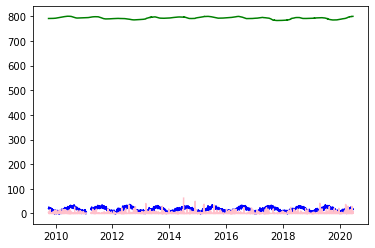

In [34]:
plt.plot(varext["Temperatura"], color = "blue")
plt.plot(varext["Nivel embalse"], color = "green")
plt.plot(varext["Precipitaciones"], color = "pink")

Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [35]:
varext['Fecha'] = varext.index
varext.reset_index(drop=True, inplace=True)
varext

,Temperatura,Nivel embalse,Precipitaciones,Fecha
0,19.7,791.28,4.2,2009-10-02
1,20.0,791.28,4.2,2009-10-03
2,20.3,791.29,0.0,2009-10-04
3,23.8,791.29,0.0,2009-10-05
4,26.3,791.29,0.0,2009-10-06
...,...,...,...,...
3899,17.2,799.80,0.0,2020-06-14
3900,19.7,799.84,0.0,2020-06-15
3901,20.1,799.86,7.0,2020-06-16
3902,19.3,799.89,0.4,2020-06-17


# PRESIONES

Carga del dataset de las presiones.

In [36]:
df3 = pd.read_excel("Presiones E08.xlsx")
df3.head()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
0,19/10/2009 00:00:00,E008ZUPCVP03,0.0,Hz,0.82,kg/cm²,M,NC,NaN
1,19/10/2009 00:00:00,E008ZUPCVP05,0.0,Hz,1.18,kg/cm²,M,NC,NaN
2,19/10/2009 00:00:00,E008ZUPCVP08,0.0,Hz,0.40,kg/cm²,M,NC,NaN
3,19/10/2009 00:00:00,E008ZUPCVP11,0.0,Hz,0.26,kg/cm²,M,NC,NaN
4,19/10/2009 00:00:00,E008ZUPCVP13,0.0,Hz,2.17,kg/cm²,M,NC,NaN


Eliminación de las columnas irrelevantes.

In [37]:
del df3["Lectura"]
del df3["Unidades de Lectura"]
del df3["Unidades de Medida"]
del df3["Flag"]
del df3["Flag Manipulación"]
del df3["Observaciones"]

In [38]:
df3.head()

,Fecha,Sensor,Medida
0,19/10/2009 00:00:00,E008ZUPCVP03,0.82
1,19/10/2009 00:00:00,E008ZUPCVP05,1.18
2,19/10/2009 00:00:00,E008ZUPCVP08,0.40
3,19/10/2009 00:00:00,E008ZUPCVP11,0.26
4,19/10/2009 00:00:00,E008ZUPCVP13,2.17


In [39]:
df3.shape

(57007, 3)

Conversión de las fechas a formato datetime.

In [40]:
df3["Fecha"] = pd.to_datetime(df3["Fecha"], format ='%d/%m/%Y %H:%M:%S')
df3.head()

,Fecha,Sensor,Medida
0,2009-10-19,E008ZUPCVP03,0.82
1,2009-10-19,E008ZUPCVP05,1.18
2,2009-10-19,E008ZUPCVP08,0.40
3,2009-10-19,E008ZUPCVP11,0.26
4,2009-10-19,E008ZUPCVP13,2.17


Comprobación del número de piezómetros.

In [41]:
df3["Sensor"].unique()

array(['E008ZUPCVP03', 'E008ZUPCVP05', 'E008ZUPCVP08', 'E008ZUPCVP11',
       'E008ZUPCVP13', 'E008ZUPCVP16', 'E008ZUPCVP09', 'E008ZUPCVP15',
       'E008ZUPCVP01', 'E008ZUPCVP02', 'E008ZUPCVP04', 'E008ZUPCVP12',
       'E008ZUPCVP06', 'E008ZUPCVP07', 'E008ZUPCVP17', 'E008ZUPCVP18',
       'E008UMPAC006', 'E008UMPAC001', 'E008UMPAC005', 'E008UMPAC004',
       'E008UMPAC003', 'E008UMPAC007', 'E008UMPAC002', 'E008UMPNP002',
       'E008UMPNP001', 'E008ZUPCVP14', 'E008ZUPCVP10'], dtype=object)

Selección de los valores de los piezómetros de cuerda vibrante.

In [42]:
df3 = df3[df3["Sensor"].isin(["E008ZUPCVP01", "E008ZUPCVP02", "E008ZUPCVP03", "E008ZUPCVP04", "E008ZUPCVP05", "E008ZUPCVP06", "E008ZUPCVP07", "E008ZUPCVP08", "E008ZUPCVP09", "E008ZUPCVP10", "E008ZUPCVP11", "E008ZUPCVP12", "E008ZUPCVP13", "E008ZUPCVP14",])]

In [43]:
df3

,Fecha,Sensor,Medida
0,2009-10-19 00:00:00,E008ZUPCVP03,0.82
1,2009-10-19 00:00:00,E008ZUPCVP05,1.18
2,2009-10-19 00:00:00,E008ZUPCVP08,0.40
3,2009-10-19 00:00:00,E008ZUPCVP11,0.26
4,2009-10-19 00:00:00,E008ZUPCVP13,2.17
...,...,...,...
57000,2020-06-18 07:00:00,E008ZUPCVP02,0.73
57001,2020-06-18 07:00:00,E008ZUPCVP04,-0.24
57002,2020-06-18 07:00:00,E008ZUPCVP10,NaN
57003,2020-06-18 07:00:00,E008ZUPCVP12,4.28


Comprobación de los NaN.

In [44]:
for i in df3["Sensor"].unique():
    print(df3[df3["Sensor"]==i].isnull().sum())
    print("**************")

Fecha       0
Sensor      0
Medida    471
dtype: int64
**************
Fecha      0
Sensor     0
Medida    40
dtype: int64
**************
Fecha      0
Sensor     0
Medida    89
dtype: int64
**************
Fecha      0
Sensor     0
Medida    87
dtype: int64
**************
Fecha      0
Sensor     0
Medida    88
dtype: int64
**************
Fecha      0
Sensor     0
Medida    37
dtype: int64
**************
Fecha      0
Sensor     0
Medida    37
dtype: int64
**************
Fecha      0
Sensor     0
Medida    37
dtype: int64
**************
Fecha      0
Sensor     0
Medida    37
dtype: int64
**************
Fecha      0
Sensor     0
Medida    86
dtype: int64
**************
Fecha      0
Sensor     0
Medida    37
dtype: int64
**************
Fecha       0
Sensor      0
Medida    753
dtype: int64
**************
Fecha      0
Sensor     0
Medida    88
dtype: int64
**************
Fecha       0
Sensor      0
Medida    916
dtype: int64
**************


Reorganización del dataframe para que los sensores se conviertan en columnas.

In [45]:
pres = df3.pivot_table(values='Medida', index='Fecha', columns='Sensor')
pres.head(3)

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP03,E008ZUPCVP04,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP07,E008ZUPCVP08,E008ZUPCVP09,E008ZUPCVP10,E008ZUPCVP11,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
Fecha,,,,,,,,,,,,,,
2009-10-19,2.38,0.78,0.82,-0.14,1.18,0.68,0.35,0.40,0.52,NaN,0.26,4.22,2.17,NaN
2009-11-24,2.38,0.83,0.93,-0.07,1.10,0.68,0.36,0.41,0.53,NaN,0.26,4.16,2.17,NaN
2009-12-14,2.38,0.78,0.86,-0.13,1.06,0.68,0.38,0.41,0.51,NaN,0.26,4.14,2.18,NaN


Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [46]:
pres['Fecha'] = pres.index
pres.reset_index(drop=True, inplace=True)
pres.head()

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP03,E008ZUPCVP04,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP07,E008ZUPCVP08,E008ZUPCVP09,E008ZUPCVP10,E008ZUPCVP11,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14,Fecha
0,2.38,0.78,0.82,-0.14,1.18,0.68,0.35,0.40,0.52,NaN,0.26,4.22,2.17,NaN,2009-10-19 00:00:00
1,2.38,0.83,0.93,-0.07,1.10,0.68,0.36,0.41,0.53,NaN,0.26,4.16,2.17,NaN,2009-11-24 00:00:00
2,2.38,0.78,0.86,-0.13,1.06,0.68,0.38,0.41,0.51,NaN,0.26,4.14,2.18,NaN,2009-12-14 00:00:00
3,2.39,0.79,0.90,-0.14,1.02,0.66,0.37,0.40,0.46,NaN,0.26,4.12,2.18,NaN,2010-01-13 00:00:00
4,2.39,0.79,0.90,-0.14,1.02,0.66,0.37,0.40,0.46,NaN,0.26,NaN,2.18,0.96,2010-01-13 08:00:00


Convergencia de las fechas duplicadas mediante una media.

In [47]:
pres=pres.resample('d', on="Fecha").mean().dropna(how='all')
pres.head()

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP03,E008ZUPCVP04,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP07,E008ZUPCVP08,E008ZUPCVP09,E008ZUPCVP10,E008ZUPCVP11,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
Fecha,,,,,,,,,,,,,,
2009-10-19,2.38,0.78,0.82,-0.14,1.18,0.68,0.35,0.40,0.52,NaN,0.26,4.22,2.17,NaN
2009-11-24,2.38,0.83,0.93,-0.07,1.10,0.68,0.36,0.41,0.53,NaN,0.26,4.16,2.17,NaN
2009-12-14,2.38,0.78,0.86,-0.13,1.06,0.68,0.38,0.41,0.51,NaN,0.26,4.14,2.18,NaN
2010-01-13,2.39,0.79,0.90,-0.14,1.02,0.66,0.37,0.40,0.46,NaN,0.26,4.12,2.18,0.96
2010-02-15,2.38,0.79,0.93,-0.14,1.01,0.65,0.36,0.40,0.38,NaN,0.26,4.17,2.18,0.96


Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [48]:
pres['Fecha'] = pres.index
pres.reset_index(drop=True, inplace=True)
pres.head()

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP03,E008ZUPCVP04,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP07,E008ZUPCVP08,E008ZUPCVP09,E008ZUPCVP10,E008ZUPCVP11,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14,Fecha
0,2.38,0.78,0.82,-0.14,1.18,0.68,0.35,0.40,0.52,NaN,0.26,4.22,2.17,NaN,2009-10-19
1,2.38,0.83,0.93,-0.07,1.10,0.68,0.36,0.41,0.53,NaN,0.26,4.16,2.17,NaN,2009-11-24
2,2.38,0.78,0.86,-0.13,1.06,0.68,0.38,0.41,0.51,NaN,0.26,4.14,2.18,NaN,2009-12-14
3,2.39,0.79,0.90,-0.14,1.02,0.66,0.37,0.40,0.46,NaN,0.26,4.12,2.18,0.96,2010-01-13
4,2.38,0.79,0.93,-0.14,1.01,0.65,0.36,0.40,0.38,NaN,0.26,4.17,2.18,0.96,2010-02-15


Conversión de los valores de presión negativos a 0 (una presión negativa no tiene sentido).

In [51]:
num = pres._get_numeric_data()
num[num._get_numeric_data() < 0] = 0
pres.head()

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP03,E008ZUPCVP04,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP07,E008ZUPCVP08,E008ZUPCVP09,E008ZUPCVP10,E008ZUPCVP11,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14,Fecha
0,2.38,0.78,0.82,0.0,1.18,0.68,0.35,0.40,0.52,NaN,0.26,4.22,2.17,NaN,2009-10-19
1,2.38,0.83,0.93,0.0,1.10,0.68,0.36,0.41,0.53,NaN,0.26,4.16,2.17,NaN,2009-11-24
2,2.38,0.78,0.86,0.0,1.06,0.68,0.38,0.41,0.51,NaN,0.26,4.14,2.18,NaN,2009-12-14
3,2.39,0.79,0.90,0.0,1.02,0.66,0.37,0.40,0.46,NaN,0.26,4.12,2.18,0.96,2010-01-13
4,2.38,0.79,0.93,0.0,1.01,0.65,0.36,0.40,0.38,NaN,0.26,4.17,2.18,0.96,2010-02-15


Generación de gráficos.

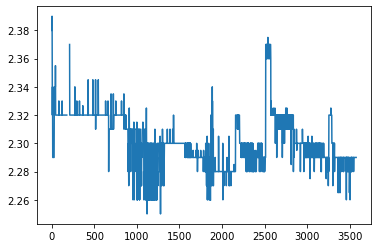

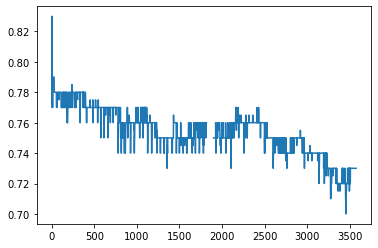

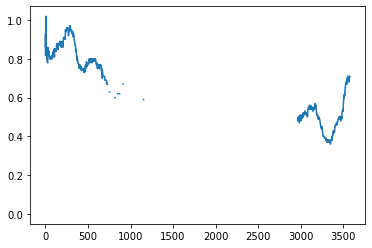

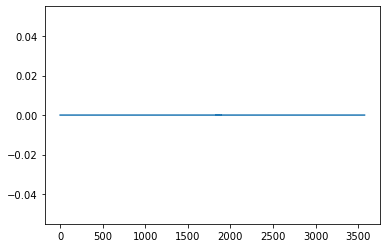

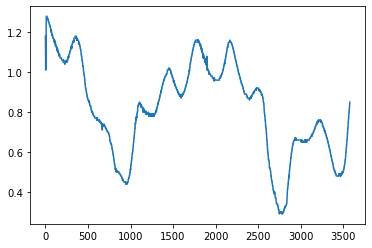

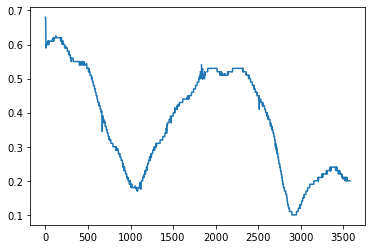

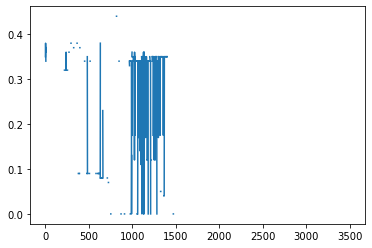

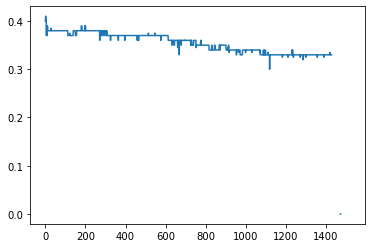

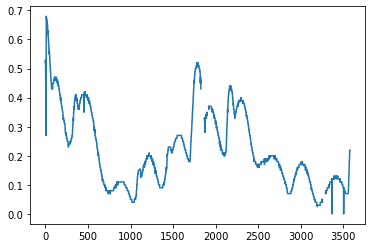

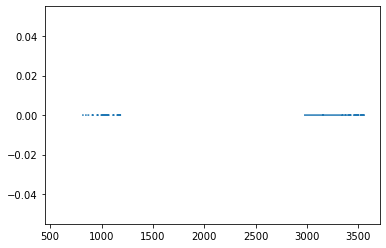

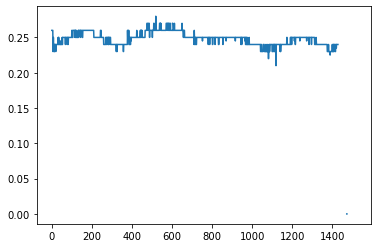

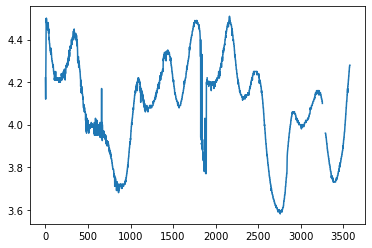

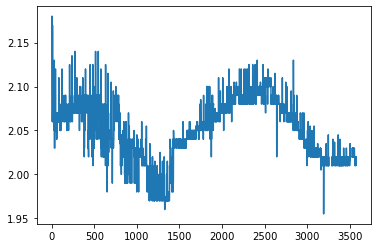

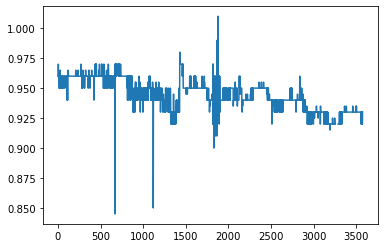

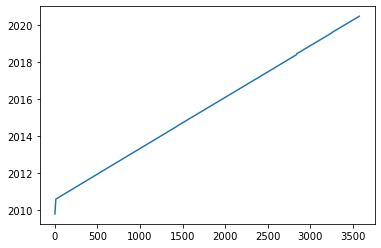

In [52]:
for i in pres.columns:
    plt.subplots()
    plt.plot(pres[i])

Comprobación de los NaN.

In [53]:
for i in pres.columns:
    print(pres[i].isnull().sum())
    print("**************")

33
**************
82
**************
2159
**************
32
**************
6
**************
49
**************
3094
**************
2143
**************
93
**************
2960
**************
2143
**************
52
**************
50
**************
54
**************
0
**************


Eliminación de los valores de los piezómetros con mayor número de NaN.

In [54]:
del pres["E008ZUPCVP03"]
del pres["E008ZUPCVP07"]
del pres["E008ZUPCVP08"]
del pres["E008ZUPCVP10"]
del pres["E008ZUPCVP11"]
del pres["E008ZUPCVP04"]

In [55]:
pres.head()

Sensor,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14,Fecha
0,2.38,0.78,1.18,0.68,0.52,4.22,2.17,NaN,2009-10-19
1,2.38,0.83,1.10,0.68,0.53,4.16,2.17,NaN,2009-11-24
2,2.38,0.78,1.06,0.68,0.51,4.14,2.18,NaN,2009-12-14
3,2.39,0.79,1.02,0.66,0.46,4.12,2.18,0.96,2010-01-13
4,2.38,0.79,1.01,0.65,0.38,4.17,2.18,0.96,2010-02-15


# DATAFRAME UNIFICADO

In [56]:
filt.head(2), filt.shape

(   AF-01  AF-05  AF-04  AF-03  AF-02      Fecha
 0  10.53  78.79    NaN  36.08  11.52 2009-10-02
 1  10.53  78.79    NaN  36.08  11.52 2009-10-03,
 (3802, 6))

In [57]:
varext.head(2), varext.shape

(   Temperatura  Nivel embalse  Precipitaciones      Fecha
 0         19.7         791.28              4.2 2009-10-02
 1         20.0         791.28              4.2 2009-10-03,
 (3904, 4))

In [58]:
pres.head(2), filt.shape

(Sensor  E008ZUPCVP01  E008ZUPCVP02  E008ZUPCVP05  E008ZUPCVP06  E008ZUPCVP09  \
 0               2.38          0.78          1.18          0.68          0.52   
 1               2.38          0.83          1.10          0.68          0.53   
 
 Sensor  E008ZUPCVP12  E008ZUPCVP13  E008ZUPCVP14      Fecha  
 0               4.22          2.17           NaN 2009-10-19  
 1               4.16          2.17           NaN 2009-11-24  ,
 (3802, 6))

In [59]:
e08 = pd.merge(filt, varext, on= "Fecha", how="outer")

In [60]:
e08.head(2)

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones
0,10.53,78.79,NaN,36.08,11.52,2009-10-02,19.7,791.28,4.2
1,10.53,78.79,NaN,36.08,11.52,2009-10-03,20.0,791.28,4.2


In [61]:
e08 = pd.merge(e08, pres, on ="Fecha", how= "outer")
e08.head(2)

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
0,10.53,78.79,NaN,36.08,11.52,2009-10-02,19.7,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.53,78.79,NaN,36.08,11.52,2009-10-03,20.0,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
e08.reset_index(drop=True, inplace=True)
e08.head(2)

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
0,10.53,78.79,NaN,36.08,11.52,2009-10-02,19.7,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.53,78.79,NaN,36.08,11.52,2009-10-03,20.0,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
e08.shape

(3911, 17)

In [64]:
e08.isnull().sum()

AF-01              112
AF-05              844
AF-04              292
AF-03              114
AF-02              112
Fecha                0
Temperatura        105
Nivel embalse       19
Precipitaciones    337
E008ZUPCVP01       368
E008ZUPCVP02       417
E008ZUPCVP05       341
E008ZUPCVP06       384
E008ZUPCVP09       428
E008ZUPCVP12       387
E008ZUPCVP13       385
E008ZUPCVP14       389
dtype: int64

In [65]:
e08.columns

Index(['AF-01', 'AF-05', 'AF-04', 'AF-03', 'AF-02', 'Fecha', 'Temperatura',
       'Nivel embalse', 'Precipitaciones', 'E008ZUPCVP01', 'E008ZUPCVP02',
       'E008ZUPCVP05', 'E008ZUPCVP06', 'E008ZUPCVP09', 'E008ZUPCVP12',
       'E008ZUPCVP13', 'E008ZUPCVP14'],
      dtype='object')

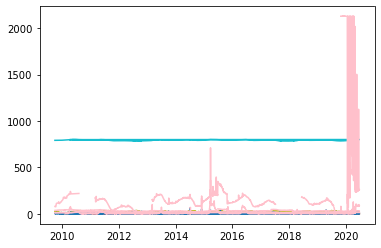

In [66]:
plt.plot(e08.Fecha,e08.E008ZUPCVP01)
plt.plot(e08.Fecha,e08.E008ZUPCVP02)
plt.plot(e08.Fecha,e08.E008ZUPCVP05)
plt.plot(e08.Fecha,e08.E008ZUPCVP06)
plt.plot(e08.Fecha,e08.E008ZUPCVP09)
plt.plot(e08.Fecha,e08.E008ZUPCVP12)
plt.plot(e08.Fecha,e08.E008ZUPCVP13)
plt.plot(e08.Fecha,e08.E008ZUPCVP14)

plt.plot(e08.Fecha,e08["Temperatura"])
plt.plot(e08.Fecha,e08["Nivel embalse"])
plt.plot(e08.Fecha,e08["Precipitaciones"])

plt.plot(e08.Fecha,e08["AF-01"], color="pink")
plt.plot(e08.Fecha,e08["AF-02"], color="pink")
plt.plot(e08.Fecha,e08["AF-03"], color="pink")
plt.plot(e08.Fecha,e08["AF-04"], color="pink")
plt.plot(e08.Fecha,e08["AF-05"], color="pink")

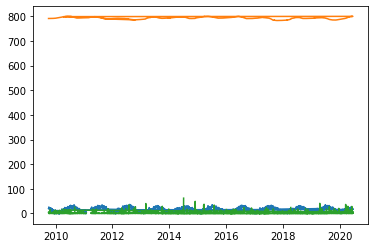

In [67]:
plt.plot(e08.Fecha,e08["Temperatura"])
plt.plot(e08.Fecha,e08["Nivel embalse"])
plt.plot(e08.Fecha,e08["Precipitaciones"])

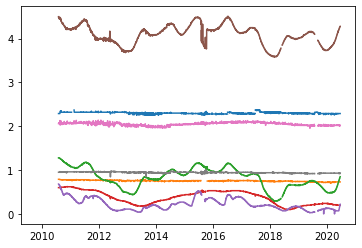

In [68]:
plt.plot(e08.Fecha,e08.E008ZUPCVP01)
plt.plot(e08.Fecha,e08.E008ZUPCVP02)
plt.plot(e08.Fecha,e08.E008ZUPCVP05)
plt.plot(e08.Fecha,e08.E008ZUPCVP06)
plt.plot(e08.Fecha,e08.E008ZUPCVP09)
plt.plot(e08.Fecha,e08.E008ZUPCVP12)
plt.plot(e08.Fecha,e08.E008ZUPCVP13)
plt.plot(e08.Fecha,e08.E008ZUPCVP14)

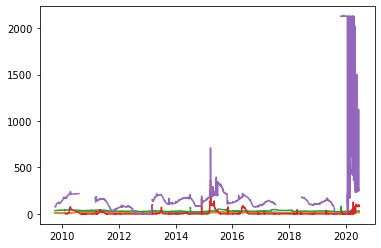

In [69]:
plt.plot(e08.Fecha,e08["AF-01"])
plt.plot(e08.Fecha,e08["AF-02"])
plt.plot(e08.Fecha,e08["AF-03"])
plt.plot(e08.Fecha,e08["AF-04"])
plt.plot(e08.Fecha,e08["AF-05"])

# PREPARACIÓN DE LOS DATOS PARA EL MODELO 

In [70]:
e08.head()

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
0,10.53,78.79,NaN,36.08,11.52,2009-10-02,19.7,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.53,78.79,NaN,36.08,11.52,2009-10-03,20.0,791.28,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.53,78.79,NaN,37.09,11.52,2009-10-04,20.3,791.29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.53,77.20,NaN,37.09,11.52,2009-10-05,23.8,791.29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.53,77.20,NaN,37.09,11.52,2009-10-06,26.3,791.29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminación de las filas con NaN mediante dropna y thresh.

In [71]:
e08 = e08.dropna(thresh=17)

Dimensiones del dataframe definitivo.

In [69]:
e08.shape

(2506, 17)

Generación de gráficos sin NaN.

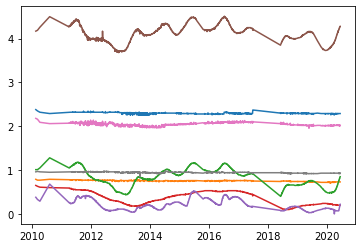

In [72]:
plt.plot(e08.Fecha,e08.E008ZUPCVP01)
plt.plot(e08.Fecha,e08.E008ZUPCVP02)
plt.plot(e08.Fecha,e08.E008ZUPCVP05)
plt.plot(e08.Fecha,e08.E008ZUPCVP06)
plt.plot(e08.Fecha,e08.E008ZUPCVP09)
plt.plot(e08.Fecha,e08.E008ZUPCVP12)
plt.plot(e08.Fecha,e08.E008ZUPCVP13)
plt.plot(e08.Fecha,e08.E008ZUPCVP14)

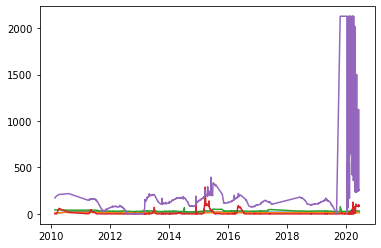

In [73]:
plt.plot(e08.Fecha,e08["AF-01"])
plt.plot(e08.Fecha,e08["AF-02"])
plt.plot(e08.Fecha,e08["AF-03"])
plt.plot(e08.Fecha,e08["AF-04"])
plt.plot(e08.Fecha,e08["AF-05"])

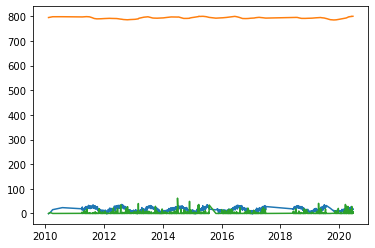

In [74]:
plt.plot(e08.Fecha,e08["Temperatura"])
plt.plot(e08.Fecha,e08["Nivel embalse"])
plt.plot(e08.Fecha,e08["Precipitaciones"])

Comprobación de la ausencia de NaN en las columnas.

In [75]:
for i in e08.columns:
    print(e08[i].isnull().sum())
    print("**************")

0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************
0
**************


In [76]:
e08

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
136,11.45,173.32,0.23,42.78,12.48,2010-02-15,-0.9,794.87,0.0,2.38,0.79,1.01,0.65,0.38,4.17,2.18,0.96
157,11.57,193.90,0.58,43.56,12.34,2010-03-08,3.8,796.32,3.8,2.35,0.77,1.01,0.63,0.33,4.19,2.16,0.97
187,12.03,209.26,59.59,43.74,12.24,2010-04-07,15.3,798.08,0.0,2.32,0.77,1.05,0.61,0.29,4.26,2.09,0.96
212,23.34,218.59,14.91,40.23,18.84,2010-08-06,23.6,798.14,0.0,2.29,0.79,1.28,0.60,0.68,4.50,2.06,0.95
449,23.03,148.28,0.70,41.31,17.91,2011-04-01,19.0,796.93,0.2,2.32,0.78,1.05,0.59,0.26,4.27,2.07,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,17.51,258.39,86.36,31.65,13.65,2020-06-14,17.2,799.80,0.0,2.29,0.73,0.82,0.20,0.18,4.27,2.02,0.92
3798,17.51,256.43,82.03,31.46,13.65,2020-06-15,19.7,799.84,0.0,2.29,0.73,0.83,0.20,0.20,4.27,2.02,0.92
3799,17.51,256.43,81.38,31.46,13.65,2020-06-16,20.1,799.86,7.0,2.29,0.73,0.83,0.20,0.21,4.28,2.02,0.92
3800,17.51,260.35,81.70,31.46,13.76,2020-06-17,19.3,799.89,0.4,2.29,0.73,0.84,0.20,0.22,4.28,2.01,0.93


# RED NEURONAL RECURRENTE 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.
C:\Users\ALCEA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ALCEA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ALCEA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ALCEA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [78]:
e08.head(2)

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
136,11.45,173.32,0.23,42.78,12.48,2010-02-15,-0.9,794.87,0.0,2.38,0.79,1.01,0.65,0.38,4.17,2.18,0.96
157,11.57,193.90,0.58,43.56,12.34,2010-03-08,3.8,796.32,3.8,2.35,0.77,1.01,0.63,0.33,4.19,2.16,0.97


Conversión del dataframe (excepto los valores de las fechas) en arreglo.

In [79]:
datos = np.array(e08.drop("Fecha", axis=1))

In [80]:
datos

array([[1.1450e+01, 1.7332e+02, 2.3000e-01, ..., 4.1700e+00, 2.1800e+00,
        9.6000e-01],
       [1.1570e+01, 1.9390e+02, 5.8000e-01, ..., 4.1900e+00, 2.1600e+00,
        9.7000e-01],
       [1.2030e+01, 2.0926e+02, 5.9590e+01, ..., 4.2600e+00, 2.0900e+00,
        9.6000e-01],
       ...,
       [1.7510e+01, 2.5643e+02, 8.1380e+01, ..., 4.2800e+00, 2.0200e+00,
        9.2000e-01],
       [1.7510e+01, 2.6035e+02, 8.1700e+01, ..., 4.2800e+00, 2.0100e+00,
        9.3000e-01],
       [1.7510e+01, 2.5904e+02, 8.3350e+01, ..., 4.2800e+00, 2.0200e+00,
        9.3000e-01]])

Normalización de los datos con valores en un rango de entre 0 y 1.

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos = scaler.fit_transform(np.array(datos))

Selección del aforador AF-01.

In [82]:
datos[:,0].shape

(2506,)

Gráfico de los aforadores 1, 2 y 3.

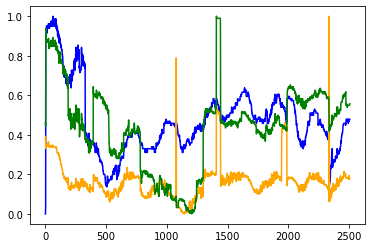

In [83]:
plt.plot(datos[:,0], color="blue") # AF-01
plt.plot(datos[:,3], color = "orange") # AF-03
plt.plot(datos[:,4], color="green") # AF-02

Gráfico de variables exteriores.

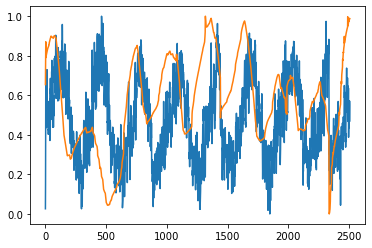

In [84]:
plt.plot(datos[:,5]) #Temperatura
plt.plot(datos[:,6]) #Nivel embalse

Gráfico de los cuatro primeros piezómetros.

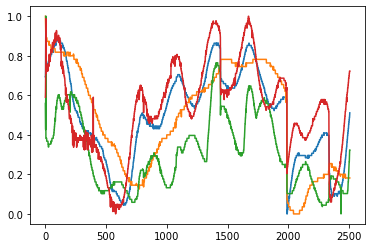

In [85]:
plt.plot(datos[:,10])
plt.plot(datos[:,11])
plt.plot(datos[:,12])
plt.plot(datos[:,13])

# PREDICCIÓN DE LAS FILTRACIONES DEL AF-01

Queremos predecir los valores del AF-01 a partir de los datos del resto de las variables. 

In [117]:
e08.head()

,AF-01,AF-05,AF-04,AF-03,AF-02,Fecha,Temperatura,Nivel embalse,Precipitaciones,E008ZUPCVP01,E008ZUPCVP02,E008ZUPCVP05,E008ZUPCVP06,E008ZUPCVP09,E008ZUPCVP12,E008ZUPCVP13,E008ZUPCVP14
136,11.45,173.32,0.23,42.78,12.48,2010-02-15,-0.9,794.87,0.0,2.38,0.79,1.01,0.65,0.38,4.17,2.18,0.96
157,11.57,193.90,0.58,43.56,12.34,2010-03-08,3.8,796.32,3.8,2.35,0.77,1.01,0.63,0.33,4.19,2.16,0.97
187,12.03,209.26,59.59,43.74,12.24,2010-04-07,15.3,798.08,0.0,2.32,0.77,1.05,0.61,0.29,4.26,2.09,0.96
212,23.34,218.59,14.91,40.23,18.84,2010-08-06,23.6,798.14,0.0,2.29,0.79,1.28,0.60,0.68,4.50,2.06,0.95
449,23.03,148.28,0.70,41.31,17.91,2011-04-01,19.0,796.93,0.2,2.32,0.78,1.05,0.59,0.26,4.27,2.07,0.96


Creamos una función que permite convertir el dataframe e08 al formato que requiere la red neuronal para el entrenamiento.

In [121]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # Secuencia de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Secuencia de la previsión (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Combinación de lo anterior
    agg = concat(cols, axis=1)
    agg.columns = names
    # Eliminación de las filas con NaN
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Eliminamos las fechas de los datos, los convertirmos a flotantes y los normalizamos con un rango de valores entre 0 y 1.

In [118]:
dataset = e08.drop("Fecha", axis=1)
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.00000000e+00, 8.14182907e-02, 7.96426437e-04, ...,
        5.90361118e-01, 1.00000000e+00, 8.46153259e-01],
       [9.47493315e-03, 9.10858884e-02, 2.00837967e-03, ...,
        6.14457607e-01, 9.11110878e-01, 9.23076630e-01],
       [4.57955003e-02, 9.83013585e-02, 2.06343710e-01, ...,
        6.98795319e-01, 5.99999428e-01, 8.46153259e-01],
       ...,
       [4.78484035e-01, 1.20459795e-01, 2.81796455e-01, ...,
        7.22891331e-01, 2.88888931e-01, 5.38461208e-01],
       [4.78484035e-01, 1.22301251e-01, 2.82904506e-01, ...,
        7.22891331e-01, 2.44443893e-01, 6.15384102e-01],
       [4.78484035e-01, 1.21685870e-01, 2.88618028e-01, ...,
        7.22891331e-01, 2.88888931e-01, 6.15384102e-01]], dtype=float32)

In [119]:
scaled.shape

(2506, 16)

Aplicamos la función de transformación en aprendizaje supervisado.

In [122]:
reframed = series_to_supervised(scaled)

In [123]:
reframed.shape

(2505, 32)

In [124]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)', 'var13(t)', 'var14(t)', 'var15(t)', 'var16(t)'],
      dtype='object')

Eliminación de las columnas de la 17 a la 32 (todas las originales, menos la de la predicción).

In [125]:
reframed.drop(reframed.columns[[range(17,32)]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.081418   0.000796   0.375910   0.461826   0.025974   
2   0.009475   0.091086   0.002008   0.389428   0.451347   0.148052   
3   0.045796   0.098301   0.206344   0.392548   0.443862   0.446753   
4   0.938808   0.102684   0.051629   0.331716   0.937874   0.662338   
5   0.914331   0.069656   0.002424   0.350433   0.868263   0.542857   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.654301   0.000000   1.000000    1.000000    0.693182    1.000000   
2   0.750328   0.061290   0.769230    0.777778    0.693182    0.963636   
3   0.866886   0.000000   0.538462    0.777778    0.738636    0.927273   
4   0.870857   0.000000   0.307692    1.000000    1.000000    0.909091   
5   0.790726   0.003226   0.538462    0.888888    0.738636    0.890909   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)   var1(t)  
1    0.558824    0.590361    1.000000    0.846153  0.009475  
2   

C:\Users\ALCEA\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [126]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var1(t)
1,0.000000,0.081418,0.000796,0.375910,0.461826,0.025974,0.654301,0.000000,1.000000,1.000000,0.693182,1.000000,0.558824,0.590361,1.000000,0.846153,0.009475
2,0.009475,0.091086,0.002008,0.389428,0.451347,0.148052,0.750328,0.061290,0.769230,0.777778,0.693182,0.963636,0.485294,0.614458,0.911111,0.923077,0.045796
3,0.045796,0.098301,0.206344,0.392548,0.443862,0.446753,0.866886,0.000000,0.538462,0.777778,0.738636,0.927273,0.426471,0.698795,0.599999,0.846153,0.938808
4,0.938808,0.102684,0.051629,0.331716,0.937874,0.662338,0.870857,0.000000,0.307692,1.000000,1.000000,0.909091,1.000000,0.987951,0.466666,0.769230,0.914331
5,0.914331,0.069656,0.002424,0.350433,0.868263,0.542857,0.790726,0.003226,0.538462,0.888888,0.738636,0.890909,0.382353,0.710843,0.511110,0.846153,0.914331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.468219,0.122917,0.340490,0.192721,0.549401,0.436364,0.980129,0.000000,0.307692,0.333333,0.477273,0.181818,0.264706,0.698795,0.288889,0.615384,0.478484
2502,0.478484,0.121381,0.299041,0.183016,0.549401,0.496104,0.980789,0.000000,0.307692,0.333333,0.477273,0.181818,0.264706,0.710843,0.288889,0.538461,0.478484
2503,0.478484,0.120460,0.284047,0.179723,0.549401,0.561039,0.983440,0.000000,0.307692,0.333333,0.488636,0.181818,0.294118,0.710843,0.288889,0.538461,0.478484
2504,0.478484,0.120460,0.281796,0.179723,0.549401,0.571429,0.984764,0.112903,0.307692,0.333333,0.488636,0.181818,0.308824,0.722891,0.288889,0.538461,0.478484


División del dataframe en un conjunto de entrenamiento y otro de prueba.

In [127]:
values = reframed.values
n_train_days = 2000 # Corte (2000 para entreanmiento y resto de prueba)
train = values[:n_train_days, :]
test = values[n_train_days:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape para que la entrada sea 3D (lo requiere la red)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2000, 1, 16) (2000,) (505, 1, 16) (505,)


In [128]:
test.shape

(505, 17)

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# Generación de la red
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) # LSTM: capa que se utiliza para series de tiempo
model.add(Dense(25, activation="relu")) # Capa oculta
model.add(Dense(12, activation="relu")) # Capa oculta
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# Entrenamiento de la red
history = model.fit(train_X, train_y, epochs=100, batch_size=100, validation_data=(test_X, test_y), verbose=1)

Train on 2000 samples, validate on 505 samples
Epoch 1/100
2000/2000 [==============================] - 1s 479us/step - loss: 0.2881 - val_loss: 0.0782
Epoch 2/100
2000/2000 [==============================] - 0s 61us/step - loss: 0.1019 - val_loss: 0.0898
Epoch 3/100
2000/2000 [==============================] - 0s 76us/step - loss: 0.0872 - val_loss: 0.0728
Epoch 4/100
2000/2000 [==============================] - 0s 60us/step - loss: 0.0805 - val_loss: 0.0765
Epoch 5/100
2000/2000 [==============================] - 0s 76us/step - loss: 0.0742 - val_loss: 0.0751
Epoch 6/100
2000/2000 [==============================] - 0s 50us/step - loss: 0.0675 - val_loss: 0.0717
Epoch 7/100
2000/2000 [==============================] - 0s 66us/step - loss: 0.0600 - val_loss: 0.0591
Epoch 8/100
2000/2000 [==============================] - 0s 70us/step - loss: 0.0511 - val_loss: 0.0444
Epoch 9/100
2000/2000 [==============================] - 0s 55us/step - loss: 0.0421 - val_loss: 0.0393
Epoch 10/100
200

Gráfico de disminución del error.

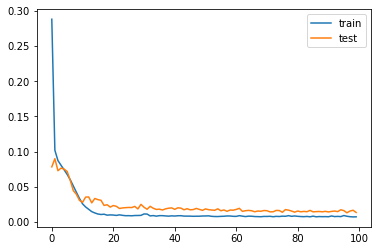

In [131]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Predicción.

In [132]:
yhat = model.predict(test_X)
yhat.shape

(505, 1)

Reshape para devolver test_X al formato previo al entrenamiento de la red neuronal.

In [133]:
test_X = test_X.reshape((test_X.shape[0], 16))
test_X.shape

(505, 16)

Inversión del proceso de escala de los valores de la predicción.

In [134]:
inv_yhat = np.concatenate((yhat, test_X[:, -15:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

Inversión del proceso de escala de los valores reales.

In [135]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -15:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Cálculo de la raíz del error cuadrático medio.

In [136]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.276


La línea azul representa los valores reales y la línea verde la predicción.

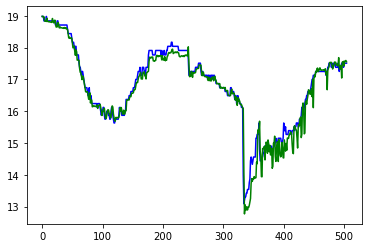

In [138]:
plt.plot(inv_y , color ="Blue")
plt.plot(inv_yhat, color ="Green")